1.First of all we will do the analysis of the data and try to find more about it.

2.Model training - create model(s) to learn to predict a target variable based on other variables.

3.Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.

4.Model comparison - comparing several different models to find the best one.

5.Hyperparameter tuning - finding better values for hyperparameters that can improve performance.

6.save the model and go for the result of prediction

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
wine_quality=pd.read_csv("Dataset/1788410-1767134-1729261-1613779-Red_wine__(1).csv")
wine_quality.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5.0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0
9,7.5,0.50,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0


## These are the following points of our wine-quality-prediction-dataset:- 

1. fixed acidity :-   Acids impart the sourness or tartness that is a fundamental feature in wine taste.

2. volatile acidity:- Volatile Acidity is often associated with oxidation problems in a wine due to the fact that both result from overexposure to oxygen and/or a lack of sulfur dioxide management.

3. citric acid :-  Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes.

4. residual sugar:-  Residual sugar or 'RS' is from the natural grape sugars left in a wine after the alcoholic fermentation finishes. The more residual sugar remaining in a wine, the sweeter the wine is.

5. Chlorides:- A major contributor to saltiness

6. free sulpur dioxide:-  Sulfur dioxide (SO2) is important in the winemaking process as it aids in preventing microbial growth and the oxidation of wine.

7. density :- The typical density or specific gravity of the must (the term we give to wine before we add or pitch the yeast) is generally between 1.080 and 1.090. This essentially means your wine is 8-9% more dense than water.

8. pH :- Wine's chemical and biological stability are very dependent on pH value. Lower pH values are known to improve the stability, so winemakers usually prefer a pH range of 3.0 to 3.5.

9. sulphates:- Sulfites are a food preservative widely used in winemaking, thanks to their ability to maintain the flavor and freshness of wine



In [64]:
wine_quality.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1598.0,46.433041,32.876249,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1598.0,3.498586,0.080346,2.74000,3.5200,3.52000,3.520000,3.90000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [65]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [67]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(wine_quality[wine_quality.columns[wine_quality.isnull().any()]])

# Transform the DataFrame to fill missing values with means of dataframe of each column
                                                                    
wine_quality[wine_quality.columns[wine_quality.isnull().any()]]=imputer.transform(wine_quality[wine_quality.columns[wine_quality.isnull().any()]])
wine_quality.isna().head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


here we filled all the NAN missing value by the mean of their respective column using SimpleImputer method

In [68]:
acidity_level_df=wine_quality.copy()
acidity_levels={
    'low':(0,0.3),
    "Moderate":(0.3,0.6),
    "High":(0.6,float('inf'))
}

def categorize_acidity(row):
    for level,(min_range, max_range) in acidity_levels.items():
        if min_range <= row['fixed acidity'] <= max_range or \
            min_range <= row['volatile acidity'] <= max_range or\
            min_range <= row['citric acid']<= max_range:
                return level
    return "unknown"        

acidity_level_df['Acidity level'] = acidity_level_df.apply(categorize_acidity,axis=1)

acidity_level_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Acidity level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.000000,0.9978,3.51,0.56,9.4,5.0,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.000000,0.9968,3.20,0.68,9.8,5.0,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.000000,0.9970,3.26,0.65,9.8,5.0,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.000000,0.9980,3.16,0.58,9.8,6.0,low
4,7.4,0.70,0.00,1.9,0.076,11.0,34.000000,0.9978,3.51,0.56,9.4,5.0,low
5,7.4,0.66,0.00,1.8,0.075,13.0,40.000000,0.9978,3.51,0.56,9.4,5.0,low
6,7.9,0.60,0.06,1.6,0.069,15.0,59.000000,0.9964,3.30,0.46,9.4,5.0,low
7,7.3,0.65,0.00,1.2,0.065,15.0,21.000000,0.9946,3.39,0.47,10.0,7.0,low
8,7.8,0.58,0.02,2.0,0.073,9.0,18.000000,0.9968,3.36,0.57,9.5,7.0,low
9,7.5,0.50,0.36,6.1,0.071,17.0,46.433041,0.9978,3.35,0.80,10.5,5.0,Moderate


Here we want to find on what quantity of fixed acidity, volatile acidity and the citric acid

 our wine show what kind of acidity level whether it ii low , moderate  and high by doing this

  procedure we can saperate the wines on the basis of their acidity and again send them to improve the quality and to keep acidity at
   advisable level 

In [69]:

sugar_categories = {
    'Dry': (0, 5),            # Example: Up to 5 grams per liter is considered dry
    'Medium Sweet': (5, 20),  # Example: 5 to 20 grams per liter is medium sweet
    'Sweet': (20, float('inf'))  # Example: Above 20 grams per liter is sweet
}

def categorize_sugar(row):
    for category, (min_range, max_range) in sugar_categories.items():
        if min_range <= row['residual sugar'] <= max_range:
            return category
    return 'Unknown'
acidity_level_df['Residual Sugar Category'] = acidity_level_df.apply(categorize_sugar, axis=1)
acidity_sugar_level_df=acidity_level_df
acidity_sugar_level_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Acidity level,Residual Sugar Category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,low,Dry
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,low,Dry
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,low,Dry
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,low,Dry
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,low,Dry


Here we defined the level of sugar content in our wine whether it is Dry , Medium sweet and sweet ,

them as according to the type of taste of comsumers we can saperate them.

<Axes: >

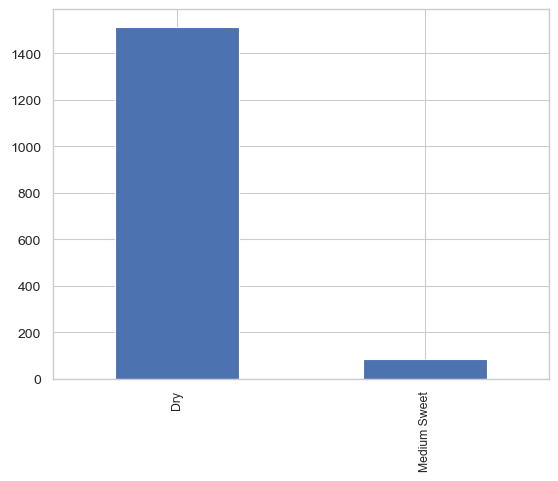

In [70]:
acidity_sugar_level_df["Residual Sugar Category"].value_counts().plot(kind='bar')

we have:- 

1515 -  Dry  (contains dry sugar)

84  -   Medium Sweet (contains medium quantity of sugar)


In [71]:
acidity_sugar_level_df.isna().head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Acidity level,Residual Sugar Category
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

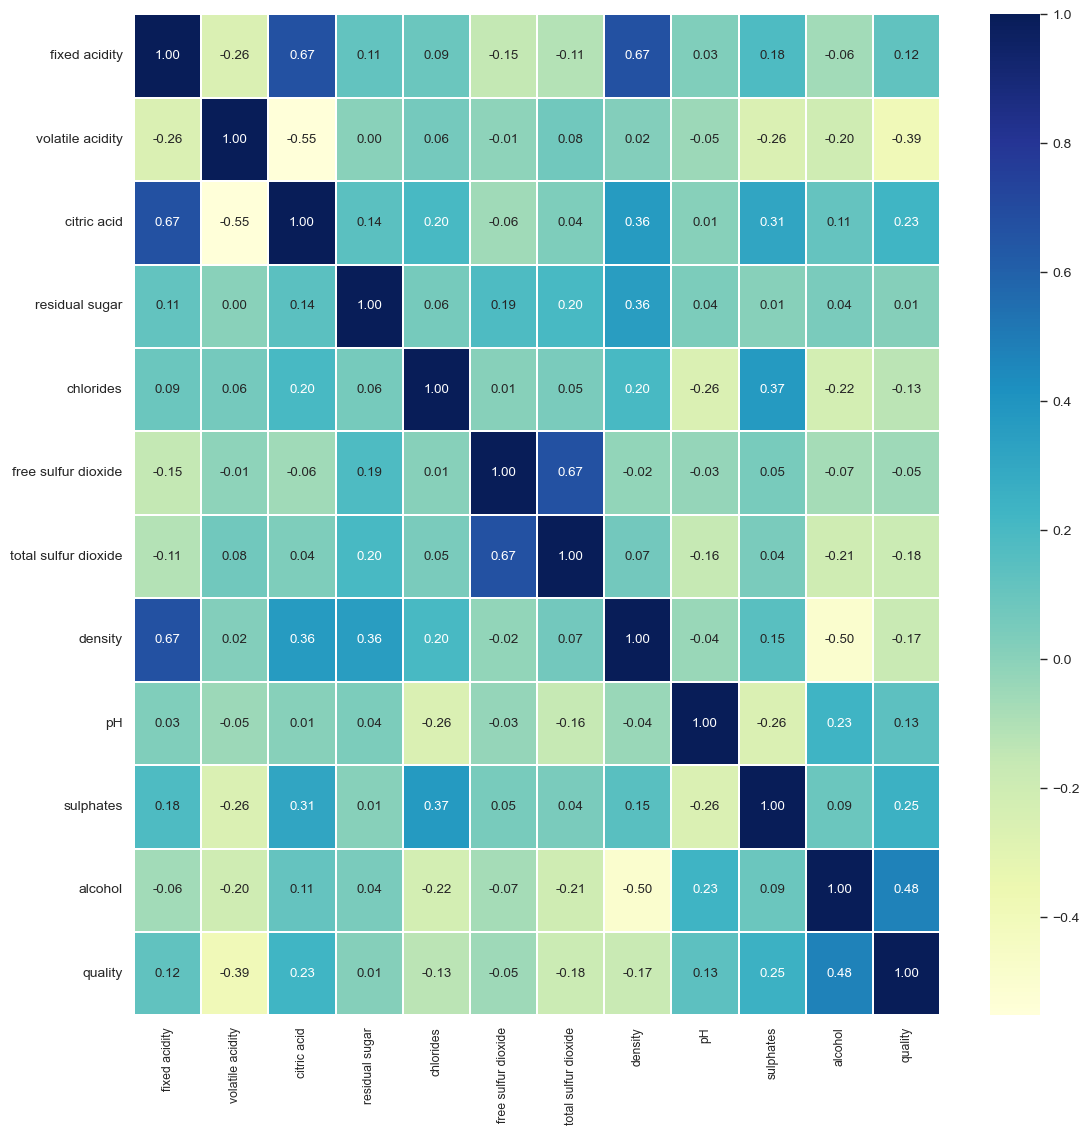

In [72]:

corr_matrix=wine_quality.corr()
plt.figure(figsize=(13,13))
sns.heatmap(corr_matrix,annot=True,
            linewidth=0.2,
            fmt='.2f',
            cmap='YlGnBu')

In [73]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

#Identify the categorical columns that need encoding , means the column tht contains the non-numeric data
categorical_columns = ['Acidity level', 'Residual Sugar Category']

#Initialize the OneHotEncoder method 
encoder = OneHotEncoder()

#Fit and transform the categorical columns
encoded_data = encoder.fit_transform(acidity_sugar_level_df[categorical_columns])


encoded_df = pd.DataFrame(encoded_data.toarray())

#Get the feature names using get_feature_names_out 
feature_names = encoder.get_feature_names_out(categorical_columns)

encoded_df.columns = feature_names

wine_quality_encoded = pd.concat([acidity_sugar_level_df, encoded_df], axis=1)

wine_quality_encoded = wine_quality_encoded.drop(categorical_columns, axis=1)
wine_quality_encoded.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Acidity level_High,Acidity level_Moderate,Acidity level_low,Residual Sugar Category_Dry,Residual Sugar Category_Medium Sweet
0,7.4,0.70,0.00,1.9,0.076,11.0,34.000000,0.9978,3.51,0.56,9.4,5.0,0.0,0.0,1.0,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.000000,0.9968,3.20,0.68,9.8,5.0,0.0,0.0,1.0,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.000000,0.9970,3.26,0.65,9.8,5.0,0.0,0.0,1.0,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.000000,0.9980,3.16,0.58,9.8,6.0,0.0,0.0,1.0,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.000000,0.9978,3.51,0.56,9.4,5.0,0.0,0.0,1.0,1.0,0.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.000000,0.9978,3.51,0.56,9.4,5.0,0.0,0.0,1.0,1.0,0.0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.000000,0.9964,3.30,0.46,9.4,5.0,0.0,0.0,1.0,1.0,0.0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.000000,0.9946,3.39,0.47,10.0,7.0,0.0,0.0,1.0,1.0,0.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.000000,0.9968,3.36,0.57,9.5,7.0,0.0,0.0,1.0,1.0,0.0
9,7.5,0.50,0.36,6.1,0.071,17.0,46.433041,0.9978,3.35,0.80,10.5,5.0,0.0,1.0,0.0,0.0,1.0


Here is our OneHotEncoder method from processing library file to convert all the non-numeric column values

 into numeric column to make data look balanced

<Axes: >

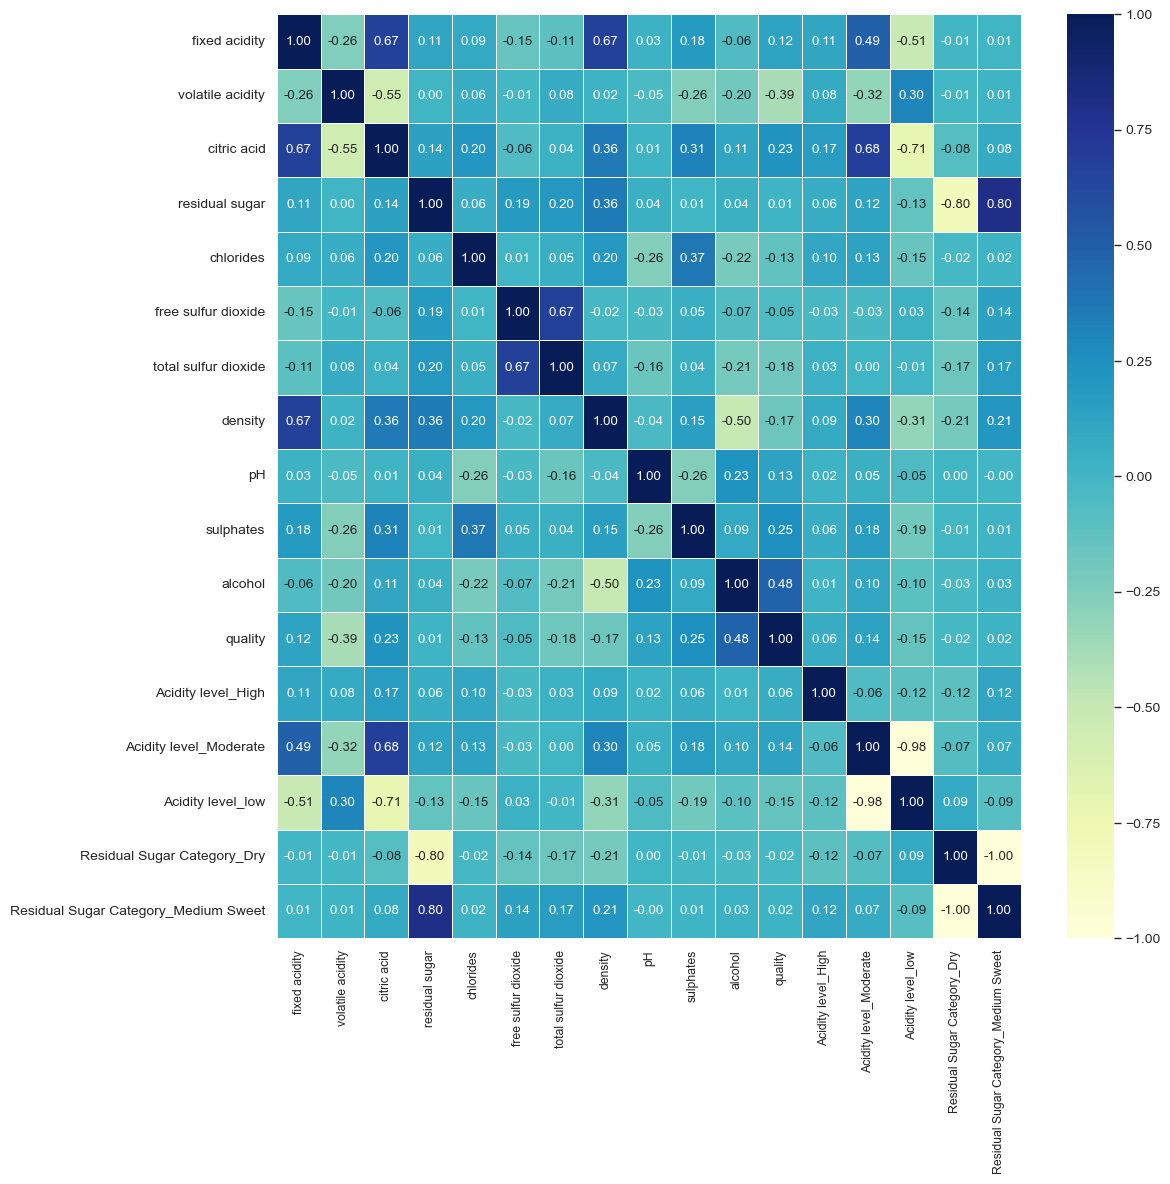

In [74]:

corr_matrix=wine_quality_encoded.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True,
            linewidth=0.5,
            fmt='.2f',
            cmap='YlGnBu')

In [75]:
low_acidity=wine_quality_encoded[wine_quality_encoded['Acidity level_low']==1]
low_acidity_df=low_acidity[['fixed acidity','volatile acidity','citric acid','Acidity level_low']]
low_acidity_df.head(10)

,fixed acidity,volatile acidity,citric acid,Acidity level_low
0,7.4,0.70,0.00,1.0
1,7.8,0.88,0.00,1.0
2,7.8,0.76,0.04,1.0
3,11.2,0.28,0.56,1.0
4,7.4,0.70,0.00,1.0
5,7.4,0.66,0.00,1.0
6,7.9,0.60,0.06,1.0
7,7.3,0.65,0.00,1.0
8,7.8,0.58,0.02,1.0
10,6.7,0.58,0.08,1.0


here we saperated acidity columns and the acidity level column 

that contains those concentration of acids for which the 

wine's acidity level is low

In [76]:
High_acidity=wine_quality_encoded[wine_quality_encoded['Acidity level_High']==1]
High_acidity_df=High_acidity[['fixed acidity','volatile acidity','citric acid','Acidity level_High']]
High_acidity_df.head(10)

,fixed acidity,volatile acidity,citric acid,Acidity level_High
364,12.8,0.615,0.66,1.0
366,12.8,0.615,0.66,1.0
378,11.4,0.625,0.66,1.0
393,8.4,0.665,0.61,1.0
429,12.8,0.840,0.63,1.0
442,15.6,0.685,0.76,1.0
455,11.3,0.620,0.67,1.0
463,8.1,0.660,0.70,1.0
861,5.8,1.010,0.66,1.0
1260,8.6,0.635,0.68,1.0


These are the acidic concentrations for which the acidity level of wine is high, using these methods wine production company can manage their wine's acidic concentration and make their product best among all 

<Axes: xlabel='fixed acidity', ylabel='density'>

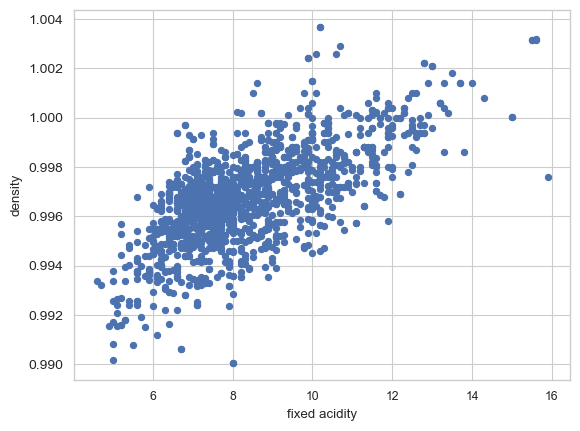

In [77]:
wine_quality_encoded.plot(kind='scatter', x='fixed acidity', y='density')


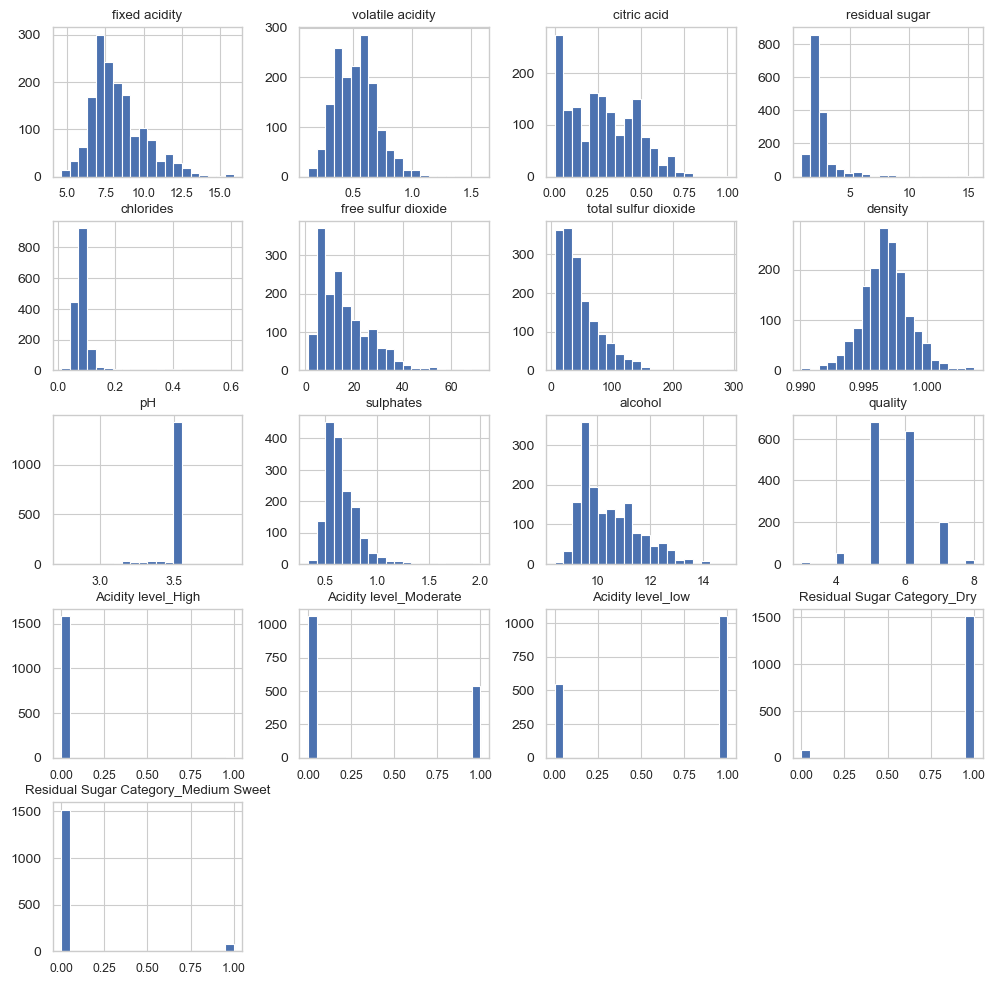

In [78]:
wine_quality_encoded.hist(bins=20, figsize=(12, 12))
plt.show()

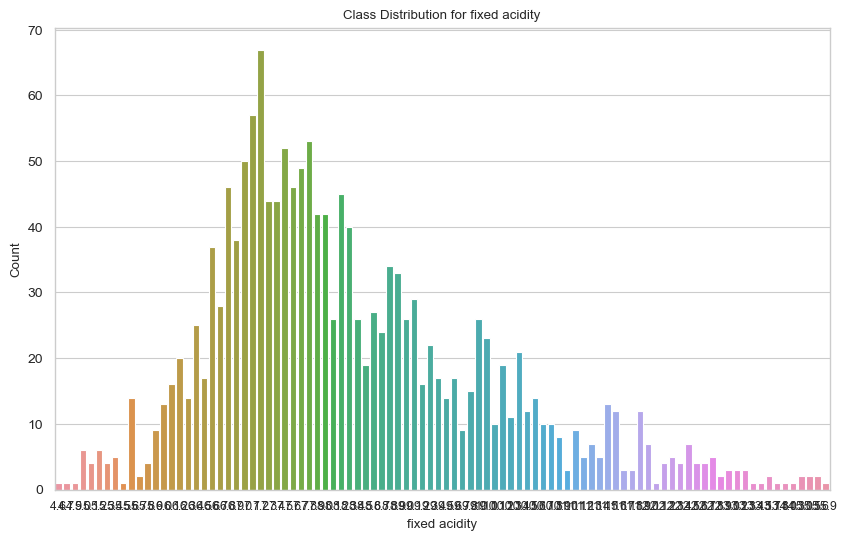

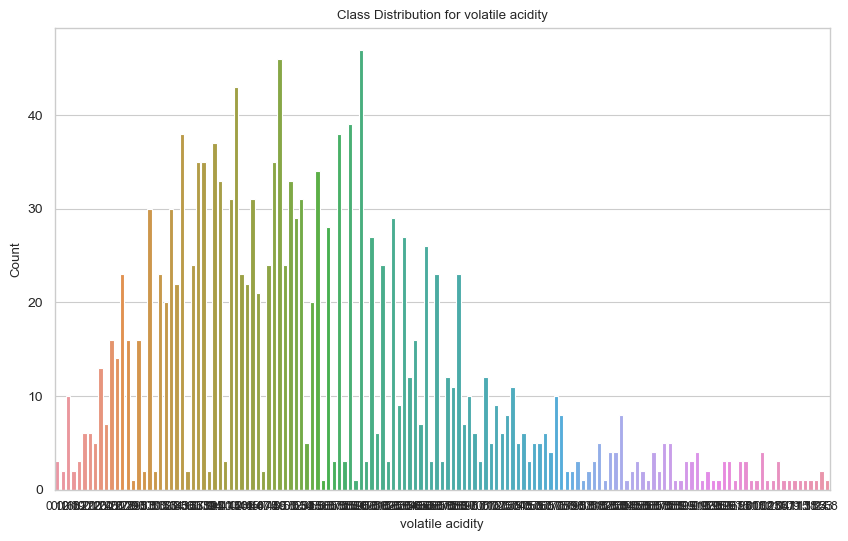

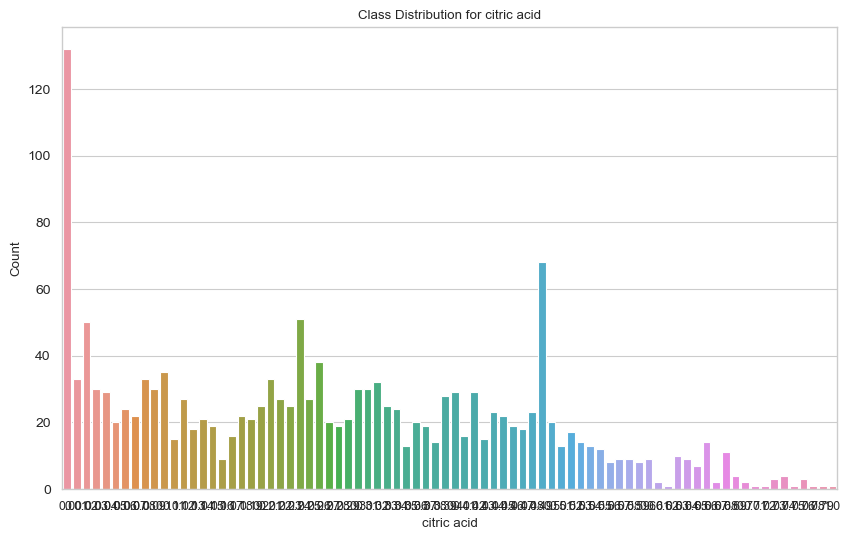

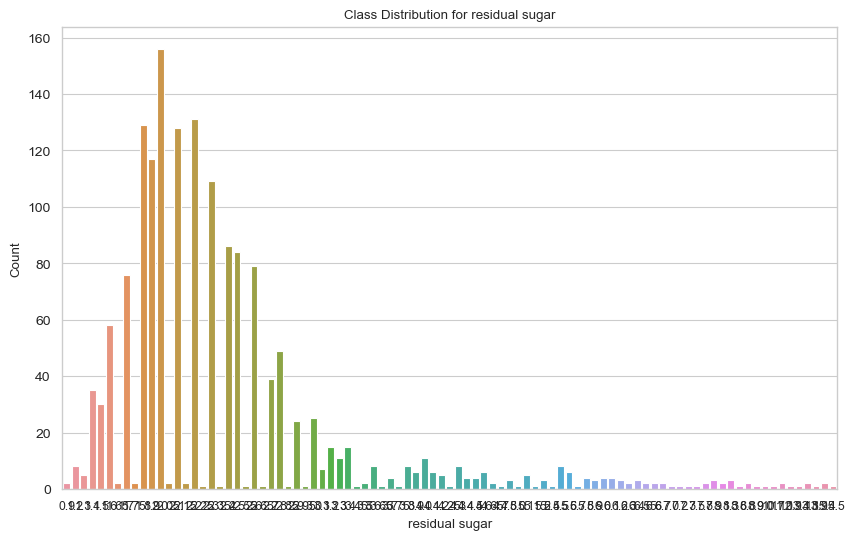

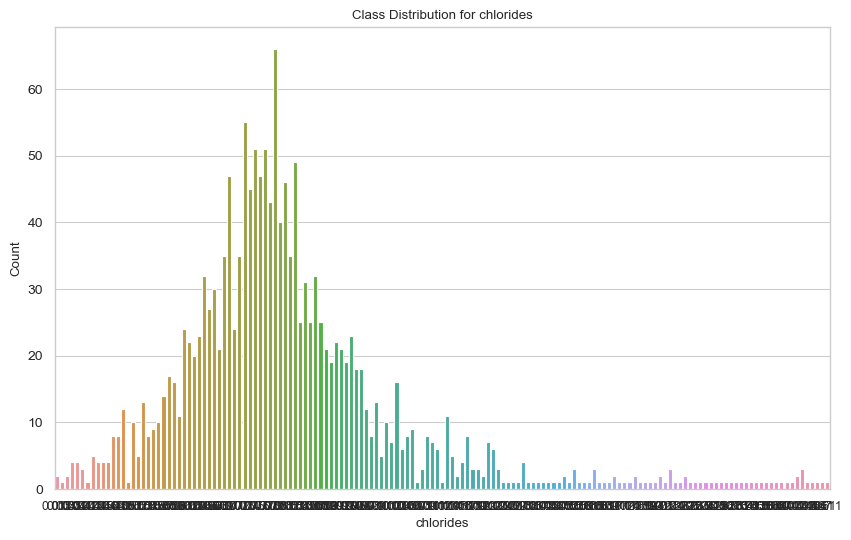

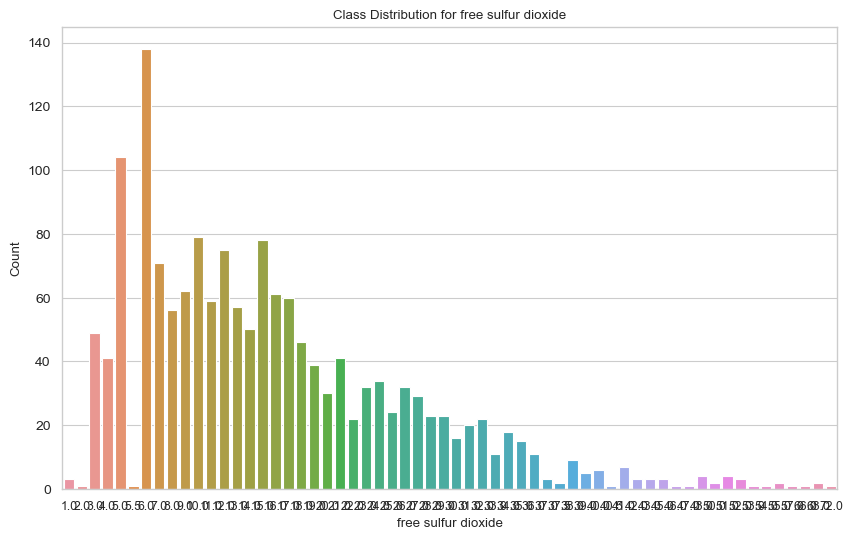

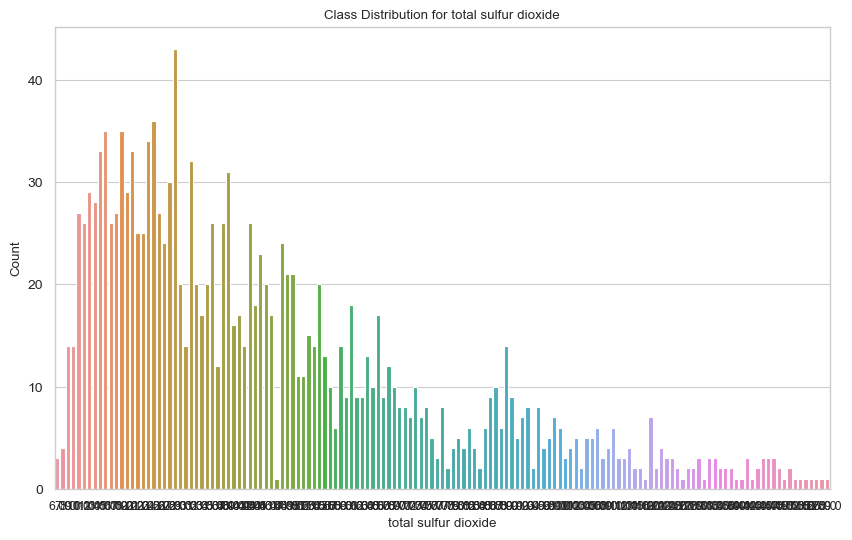

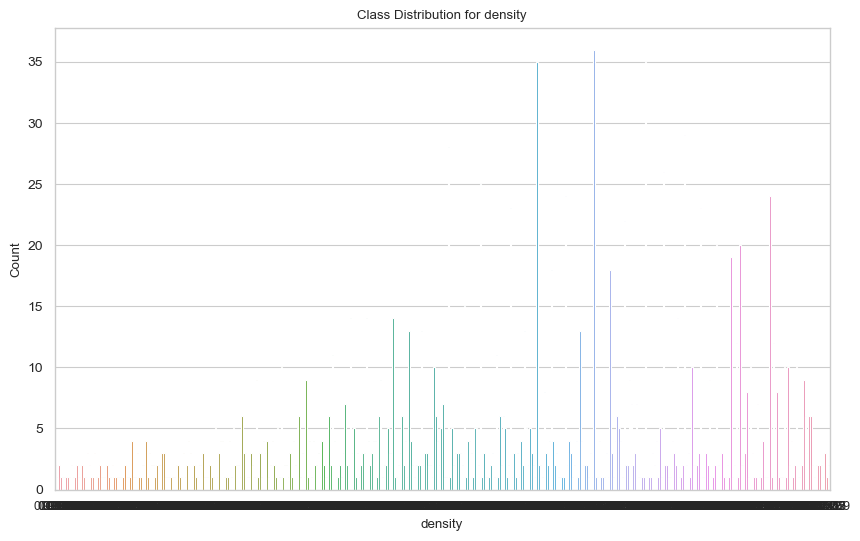

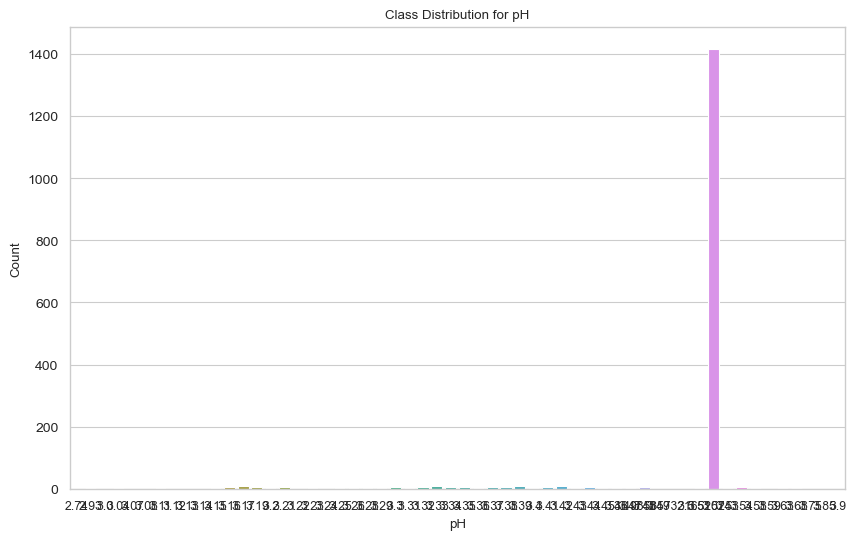

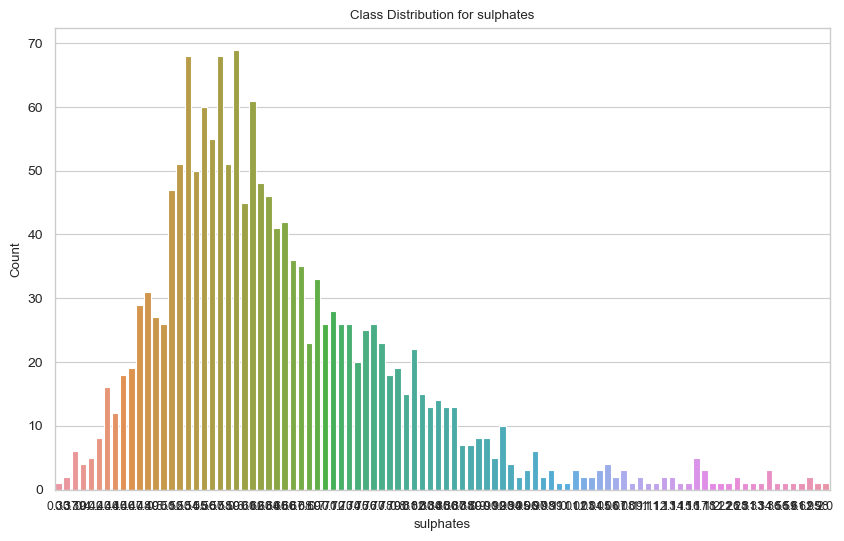

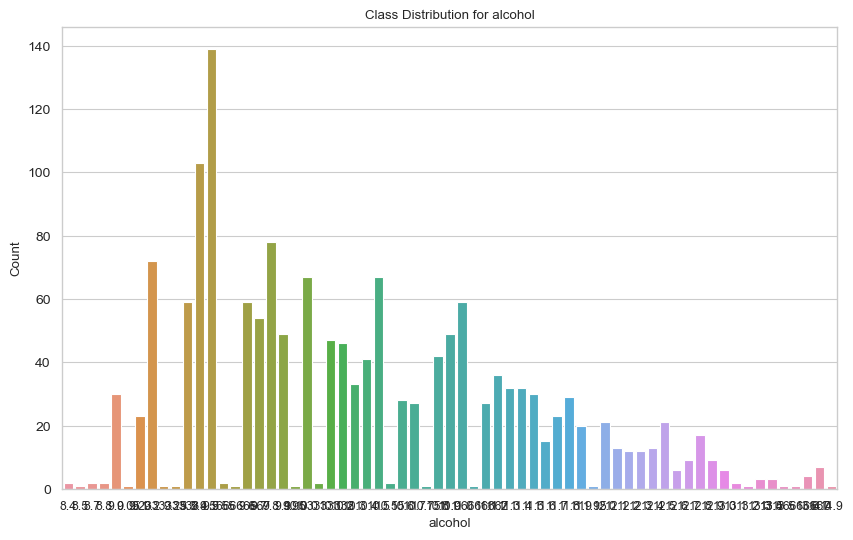

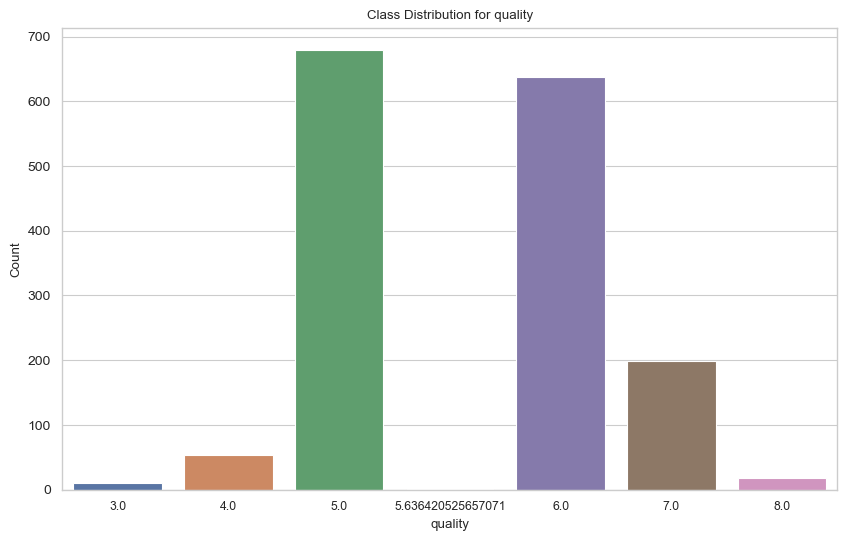

In [79]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Set the style for seaborn
sns.set(style='whitegrid')

# Customize font sizes for labels and axis ticks
sns.set_context("paper", rc={"axes.labelsize": 10})  # Adjust label font size
sns.set_context("paper", rc={"xtick.labelsize": 1})  # Adjust x-axis tick label font size
sns.set_context("paper", rc={"ytick.labelsize": 10})  # Adjust y-axis tick label font size

# Create countplots for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=wine_quality)
    plt.title(f'Class Distribution for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

As we can clearly see our dataset contains imbalanced data 

To smoothen our dataset , from the imbalanced data library we import SMOTE

In [80]:
from imblearn.over_sampling import SMOTE
wine_quality['best quality'] = [1 if x > 5 else 0 for x in wine_quality.quality]
wine_quality.head()

# Here 1 represents the best quality wines the the score 0 represents the poor quality wines.


X=wine_quality.drop(['quality','best quality'],axis=1)
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.000000,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.000000,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.000000,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.000000,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.000000,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.000000,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.000000,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.000000,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.000000,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,46.433041,0.9978,3.35,0.80,10.5


SCORE 1 IS GIVEN TO THE BEST QUALITY WINES AND THE SCORE 0 IS GIVEN TO THE POOR QUALITY WINES ,

 YOU CAN IMAGINE AS THE DATASETS HAS RED WINES , SO THE 

1  - RED WINE;

2  - WHITE WINE;M

In [81]:
y=wine_quality['best quality']
y.head(10)

0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    1
8    1
9    0
Name: best quality, dtype: int64

In [82]:
smote=SMOTE(sampling_strategy='auto',random_state=42)
X_resampled,y_resampled=smote.fit_resample(X,y)

## Train the model

test and train the model to predict the score to the algorithm

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X_resampled,#independent variables
                                               y_resampled,#dependent variable
                                               test_size=0.2  ) #percentage 
#a thumb rule is to use 80% of your data to train and other 20% of your data to test

In [84]:
X_train.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.52,0.70,11.3
1357,7.3,0.430,0.24,2.5,0.078,27.0,67.0,0.99648,3.52,0.59,11.1
518,10.9,0.210,0.49,2.8,0.088,11.0,32.0,0.99720,3.52,0.68,11.7
1111,5.4,0.420,0.27,2.0,0.092,23.0,55.0,0.99471,3.52,0.64,12.3
538,12.9,0.350,0.49,5.8,0.066,5.0,35.0,1.00140,3.52,0.66,12.0
764,9.1,0.680,0.11,2.8,0.093,11.0,44.0,0.99888,3.52,0.55,9.5
1023,8.2,0.320,0.42,2.3,0.098,3.0,9.0,0.99506,3.52,0.55,12.3
1366,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.52,0.50,9.8
365,10.0,0.420,0.50,3.4,0.107,7.0,21.0,0.99790,3.52,0.93,11.8
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,3.52,0.74,11.1


In [85]:
y_train.head(10)

408     1
1357    1
518     1
1111    1
538     1
764     1
1023    1
1366    0
365     1
555     0
Name: best quality, dtype: int64

In [86]:
X_test.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
651,9.8,0.880,0.25,2.5,0.104,35.0,155.0,1.00100,3.52,0.67,11.2
1124,6.5,0.580,0.00,2.2,0.096,3.0,13.0,0.99557,3.52,0.62,11.5
1647,7.5,0.610,0.26,1.9,0.073,24.0,88.0,0.99612,3.52,0.53,9.8
405,8.7,0.310,0.46,1.4,0.059,11.0,25.0,0.99660,3.52,0.76,10.1
534,10.0,0.480,0.24,2.7,0.102,13.0,32.0,1.00000,3.52,0.56,10.0
1377,5.2,0.490,0.26,2.3,0.090,23.0,74.0,0.99530,3.52,0.62,12.2
1261,6.3,1.020,0.00,2.0,0.083,17.0,24.0,0.99437,3.52,0.55,11.2
23,8.5,0.490,0.11,2.3,0.084,9.0,67.0,0.99680,3.17,0.53,9.4
602,7.7,0.835,0.00,2.6,0.081,6.0,14.0,0.99750,3.52,0.52,9.3
1110,8.3,0.530,0.00,1.4,0.070,6.0,14.0,0.99593,3.52,0.64,10.0


In [87]:
y_test.head(10), len(y_test)

(651     0
 1124    0
 1647    0
 405     1
 534     1
 1377    1
 1261    0
 23      0
 602     0
 1110    1
 Name: best quality, dtype: int64,
 343)

The above smoothning of imbalanced dataset done because the clasification models cannot handle mix multiple data's means the datas that are continuous as well as imbalanced

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier




models={"KNeighbors classifier":KNeighborsClassifier(),
        "Gradient Boosting ":GradientBoostingClassifier(),
        "Random Forest":RandomForestClassifier(),
       
        }

#create a function to fit the model:- 
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    #make list to keep the models at a place 
    model_scores={}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores
model_scores=fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

{'KNeighbors classifier': 0.6501457725947521,
 'Gradient Boosting ': 0.7755102040816326,
 'Random Forest': 0.8134110787172012}

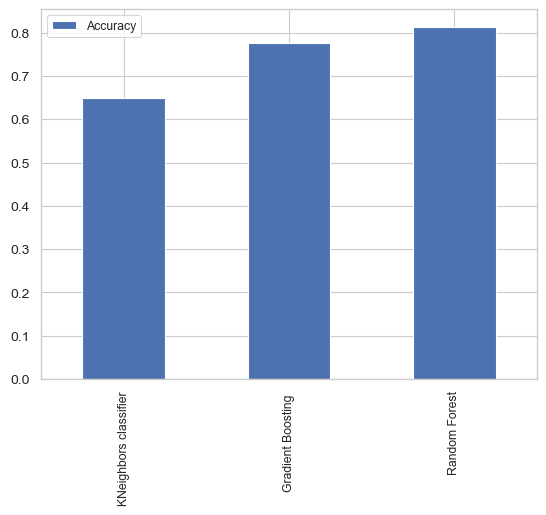

In [89]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar();

## Hyper-Parameter Tuning 

ok we have now three models but first we are trying to do parameter tuning with the KNeighborsClassifier model , then go for our best model RandomForestClassifier

In [90]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

#list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20
knn = KNeighborsClassifier()

# Loop through different neighbors values to check which one is closest
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithmic model to check the efficiency of model
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [91]:
train_scores

[1.0,
 0.8568298027757487,
 0.8487947406866326,
 0.7859751643535428,
 0.787436084733382,
 0.7545653761869978,
 0.7574872169466764,
 0.7268078889700511,
 0.7297297297297297,
 0.7195032870708546,
 0.7195032870708546,
 0.706355003652301,
 0.7151205259313368,
 0.7173119065010957,
 0.7246165084002922,
 0.706355003652301,
 0.7136596055514974,
 0.7034331628926224,
 0.7216946676406136,
 0.716581446311176]

Maximum KNN score on the test data: 74.05%


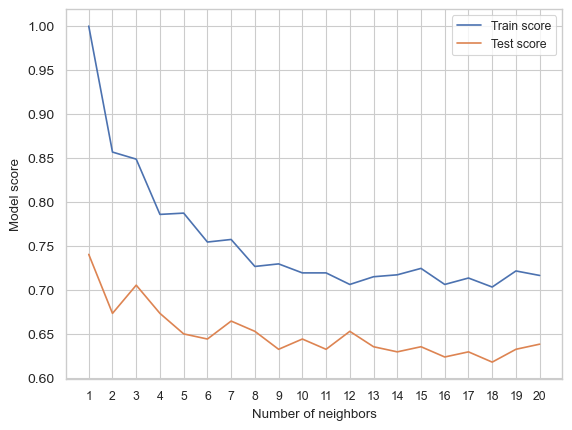

In [92]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Look at the graph N- neigbors 12 seems best


Now let's start tuning with our RandomForestClassifier model 

the parameters for RandomForestClassifier are n_estimators, max_depth, min_samples_leaf, min_samples_split , adjust their tuning values to increase our model performance 

In [93]:

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 600, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 30, 2),
           "min_samples_leaf": np.arange(1, 30, 2)}

In [94]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [95]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 250,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [96]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8163265306122449

well , by doing so much of tuning our model's performance increased just a little 

## Confusion Matrix

In [97]:
## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" (see below)
from sklearn.metrics import RocCurveDisplay
# Display confusion matrix

prediction = rs_rf.predict(X_test) 

In [98]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       169
           1       0.82      0.82      0.82       174

    accuracy                           0.82       343
   macro avg       0.82      0.82      0.82       343
weighted avg       0.82      0.82      0.82       343



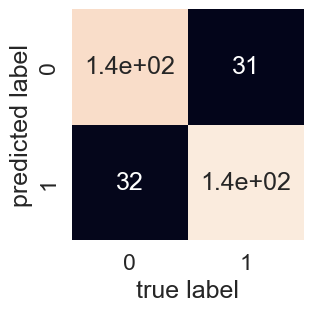

In [99]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, prediction)

The confusion matrix tell us about whether our model predicted true or not , whether we choose right label or not 

this tells us that for 31 occasaions our model predicted 0 but it should be 1 and for 32 occasaions our model predicted 1 but it should be 0 , it's not that much of bad as i guess 

In [100]:
print("MAE:" , mean_absolute_error(y_test,prediction))
print("MSE:" , mean_squared_error(y_test,prediction))
print("RMSE:" , np.sqrt(mean_squared_error(y_test,prediction)))

MAE: 0.1836734693877551
MSE: 0.1836734693877551
RMSE: 0.4285714285714286


Great our error value is quite impressable 

In [101]:
test_df = pd.DataFrame({
    "Predicted Wine quality" : models["Random Forest"].predict(X_test),
    "Actual Wine quality" : y_test,
}).reset_index(drop = True)
test_df.head(15)

,Predicted Wine quality,Actual Wine quality
0,0,0
1,1,0
2,0,0
3,1,1
4,0,1
5,1,1
6,0,0
7,0,0
8,0,0
9,1,1


## So our model's efficiency is 81.63% and we got an arror of only 0.183 , i think our model just run well with this efficiency 